In [4]:
!pip install wandb

     |████████████████████████████████| 2.1MB 23.8MB/s 
     |████████████████████████████████| 133kB 38.8MB/s 
     |████████████████████████████████| 163kB 36.4MB/s 
     |████████████████████████████████| 102kB 9.8MB/s 
     |████████████████████████████████| 71kB 7.6MB/s 
  Created wheel for pathtools: filename=pathtools-0.1.2-cp37-none-any.whl size=8786 sha256=893ce85e5bfe1638c7aa27424040931c237e098c29b413c5b31b998688d4760d
  Stored in directory: /root/.cache/pip/wheels/0b/04/79/c3b0c3a0266a3cb4376da31e5bfe8bba0c489246968a68e843
  Created wheel for subprocess32: filename=subprocess32-3.5.4-cp37-none-any.whl size=6489 sha256=ebb87e7d44aae061cf422248d2acd761fe3f7a6f33d84371229eb0eb2f89fe5a
  Stored in directory: /root/.cache/pip/wheels/68/39/1a/5e402bdfdf004af1786c8b853fd92f8c4a04f22aad179654d1
Successfully built pathtools subprocess32


In [5]:
import wandb
import os
import cv2
from PIL import Image
import string
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import albumentations as alb
#from albumentations.augmentations.  CenterCrop, MedianBlur, VerticalFlip, InvertImg
import nltk
#nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk import pos_tag, ne_chunk
from textblob import TextBlob
#import textfeatures
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from wordcloud import WordCloud, ImageColorGenerator
from wordcloud import STOPWORDS as stopwords_wc

In [8]:
## 이미지 
def show_values_on_bars(axs, h_v="v", space=0.4):
    
        def _show_on_single_plot(ax):
                if h_v == "v":
                            for p in ax.patches:
                                            _x = p.get_x() + p.get_width() / 2
                                                            _y = p.get_y() + p.get_height()
                                                                            value = int(p.get_height())
                                                                                            ax.text(_x, _y, format(value, ','), ha="center") 

def show_values_on_bars(axs, h_v="v", space=0.4):
    
    def _show_on_single_plot(ax):
        if h_v == "v":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height()
                value = int(p.get_height())
                ax.text(_x, _y, format(value, ','), ha="center") 
        elif h_v == "h":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() + float(space)
                _y = p.get_y() + p.get_height()
                value = int(p.get_width())
                ax.text(_x, _y, format(value, ','), ha="left")

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_single_plot(ax)
    else:
        _show_on_single_plot(axs)

Total no. of images with duplicates: 1,246


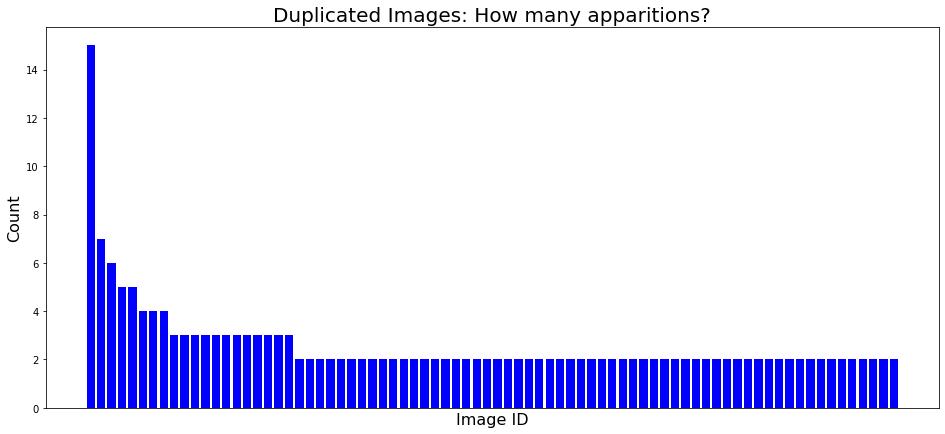

In [48]:
train_df = pd.read_csv("/content/drive/MyDrive/Machine Learning Colab/Shopee/shopee-product-matching/train.csv")
image_count = train_df["image"].value_counts().reset_index()
image_count.columns = ["image", "count"]
image_count_duplicates = image_count[image_count["count"] > 1]
print("Total no. of images with duplicates: {:,}".format(len(image_count_duplicates)))
my_colors = ["r", "b", "g", "black", "b"]

#구성 plot 
fig, ax = plt.subplots(figsize=(16, 7))
plt.bar(x=image_count_duplicates.iloc[::16]["image"],
        height=image_count_duplicates.iloc[::16]["count"],
        color=my_colors[4])
plt.title("Duplicated Images: How many apparitions?", fontsize=20)
plt.xticks([])
plt.xlabel("Image ID", fontsize=16)
plt.ylabel("Count", fontsize=16);

In [45]:
# 다른 이미지 정보

def get_image_info(name):
    
    # Read in the image & corresponding metadata
    sample_image = cv2.imread(train_base + "/" + name)
    sample_image = cv2.cvtColor(sample_image, cv2.COLOR_BGR2RGB)
    sample_df = train_df[train_df["image"] == name]
    
    print(color.BOLD + "이미지 발생:" + color.END, len(sample_df), "\n" +
          color.BOLD + "타이틀:" + color.END, sample_df["title"].value_counts().index[:5].values, "\n" +
          color.BOLD + "No. of unique groups:" + color.END, sample_df["label_group"].value_counts().shape[0])

    # Plot image
    plt.figure(figsize=(16, 7))
    plt.imshow(sample_image)
    plt.axis("off")
    plt.show();

In [39]:
class color:
    BOLD = '\033[1m' + '\033[93m'
    END = '\033[0m'

In [40]:
# 데이터 불러오기
train_base = "/content/drive/MyDrive/Machine Learning Colab/Shopee/shopee-product-matching/train_images"

이미지 출현: 7 
타이틀: ['Salsa Dynamatte Lip Cream'
 'Salsa Dynamatte Lip Cream/lipcream salsa dynamatte'
 'SALSA DYNAMATTE LIPCREAM MATTE BPOM / LIP CREAM MATTE / LONG LASTING MATTE'
 'SALSA DYNAMATTE LIP CREAM (MATTE LIP CREAM) 5GR'
 'Salsa Dynamatte Lipcream - Lip Cream'] 
No. of unique groups: 1


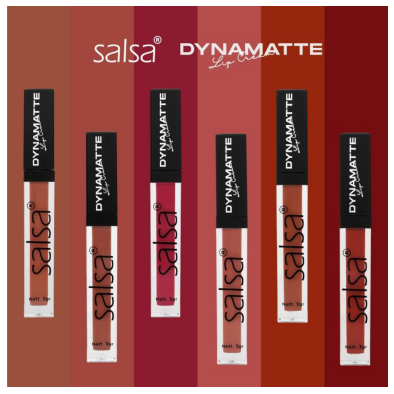

In [44]:
# 이미지 예시 
sample_name = image_count_duplicates.iloc[10]["image"]
get_image_info(name = sample_name)

이미지 발생: 3 
타이틀: ['VIVO Y12 SKIN CARBON BACKSCREEN PROTECTOR ANTI GORES HP'
 'VIVO Y15 SKIN CARBON BACKSCREEN PROTECTOR ANTI GORES HP'
 'VIVO Y17 SKIN CARBON BACKSCREEN PROTECTOR ANTI GORES HP'] 
No. of unique groups: 1


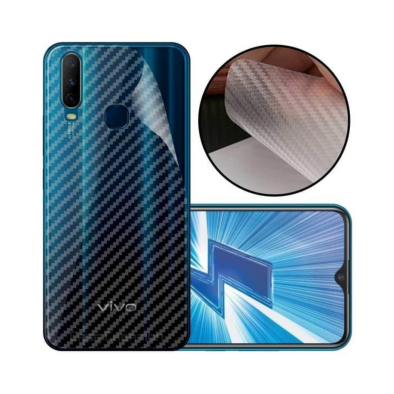

In [50]:
# 이미지 예시 
sample_name = image_count_duplicates.iloc[222]["image"]
get_image_info(name = sample_name)

이미지 발생: 2 
타이틀: ['JOYKO Index & Mark / Penanda / Pembatas / Index Memo IM 33 / Panah Kertas / IM33'
 'JOYKO PEMBATAS PENANDA PANAH INDEX MARK IM 33 MURAH STICKY NOTES POST IT PANAH BUKU MEMO TEMPEL'] 
No. of unique groups: 1


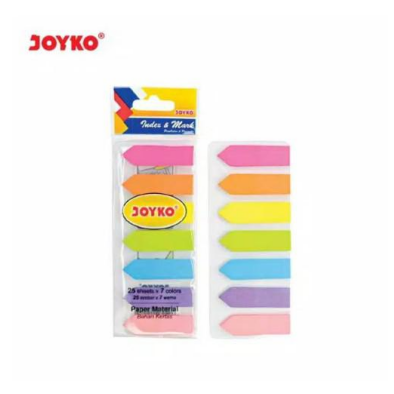

In [51]:
# 이미지 예시 
sample_name = image_count_duplicates.iloc[555]["image"]
get_image_info(name = sample_name)

In [56]:
# 중복 삭제

def clean_duplicates(df, train=True):

    
    if train == True:
        df["label_group"] = df["label_group"].astype(str)
    df = df.drop_duplicates(subset=['image']).reset_index(drop=True)
    
    return df

In [55]:
train_df = clean_duplicates(df=train_df)

print("train metadata가 image train folder와 같나요?", "\n",
      train_df.shape[0] == len(os.listdir(train_base)))

## True 가 나와야 함.


train metadata가 image train folder와 같나요? 
 False


No. of unique groups: 11,011 
Max no. of apparitions in 1 group: 50 
Min no. of apparitions in 1 group: 1


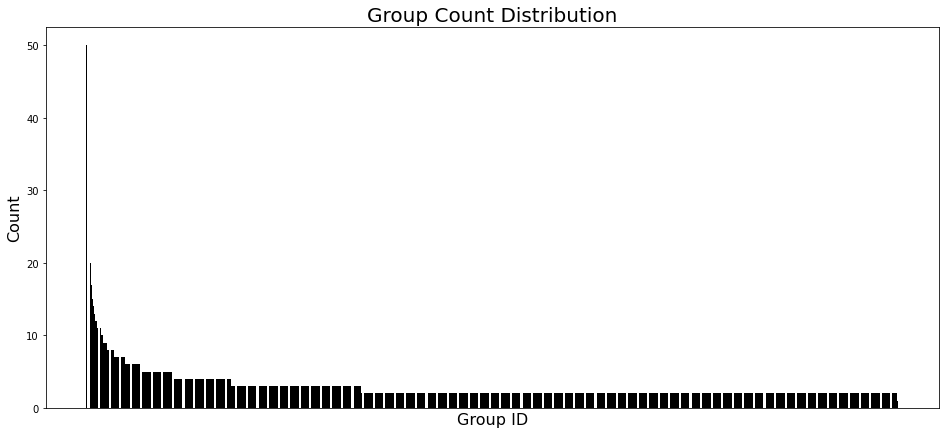

In [60]:
# Get count of values on each group
groups_df = train_df["label_group"].value_counts().reset_index()
groups_df.columns = ["group", "count"]

# Print info
print("No. of unique groups: {:,}".format(len(groups_df)), "\n" +
      "Max no. of apparitions in 1 group: {}".format(groups_df["count"].max()), "\n" +
      "Min no. of apparitions in 1 group: {}".format(groups_df["count"].min()))

fig, ax = plt.subplots(figsize=(16, 7))
plt.bar(x=groups_df.iloc[::15]["group"],
        height=groups_df.iloc[::15]["count"],
        color=my_colors[3])
plt.title("Group Count Distribution", fontsize=20)
plt.xticks([])
plt.xlabel("Group ID", fontsize=16)
plt.ylabel("Count", fontsize=16)
plt.show();
           

In [62]:
def get_group_info(group_name):
    
    # 이 그룹에서 6개 이미지 샘플을 가져옴
    sample_names = train_df[train_df["label_group"] == group_name]["image"].\
                    sample(6, random_state=24).values
    sample_text = train_df[train_df["label_group"] == group_name]["title"].\
                    sample(1, random_state=1).values

    # Plot
    fig = plt.figure(figsize=(16, 8))
    plt.suptitle(f"Group: {sample_group}", fontsize=20)
    plt.title(f"{sample_text}", fontsize=15)
    plt.axis("off")
    for k, name in enumerate(sample_names):
        image = cv2.imread(train_base + "/" + name)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

        fig.add_subplot(2, 3, k+1)
        plt.imshow(image)
        plt.axis("off")
    
    plt.show();

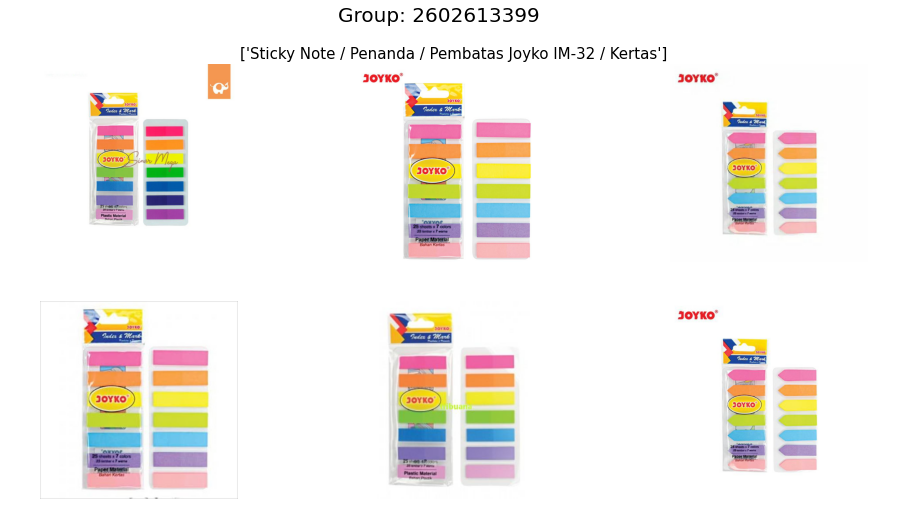

In [64]:
sample_group = groups_df["group"][100]
get_group_info(group_name=sample_group)

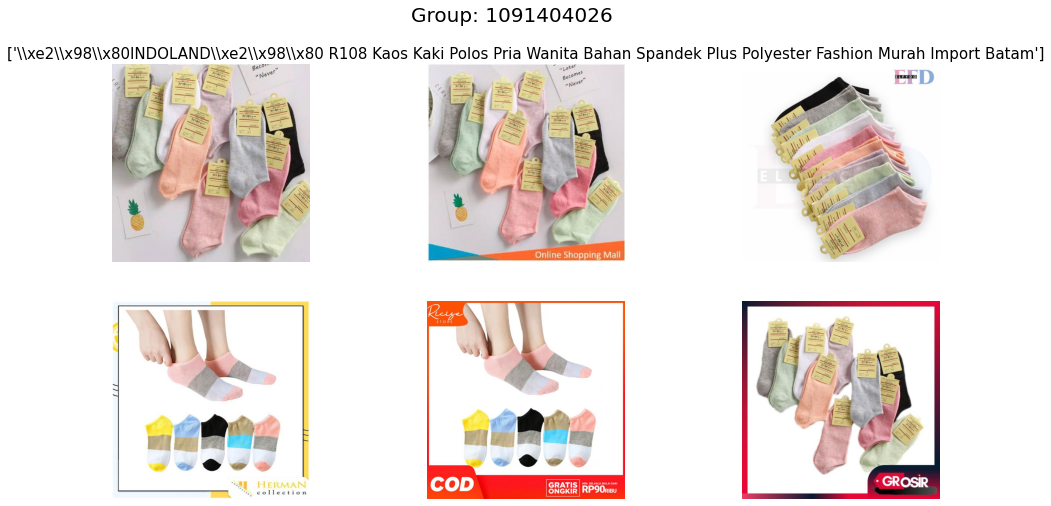

In [65]:
sample_group = groups_df["group"][10]
get_group_info(group_name=sample_group)

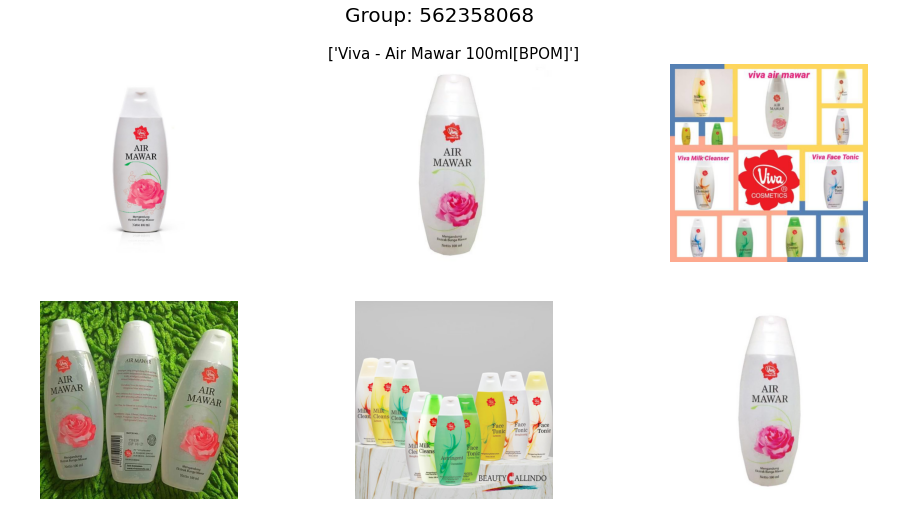

In [66]:
sample_group = groups_df["group"][1]
get_group_info(group_name=sample_group)

In [ ]:
# 제출
# data=pd.read_csv('../input/shopee-product-matching/sample_submission.csv')

In [ ]:
# data[['posting_id','matches']].to_csv('submission.csv',index=False)
# print("Submission 완료")